# **Item 2**

**Em muitas aplicações as funções $(f_1, f_2, f_3, f_4, f_5)$ não são conhecidas de forma explícita. Portanto a matriz Jacobiana precisa ser obtida de forma aproximada, por diferenças finitas.**

In [65]:
R, R5, R6, R7, R8, R9, R10 = [10.0, 0.193, 4.10622e-4, 5.45177e-4, 4.4975e-7, 3.40735e-5, 9.615e-7]

f1 = lambda x1, x2, x3, x4, x5: x1*x2+x1-3*x5
f2 = lambda x1, x2, x3, x4, x5: 2*x1*x2+x1+3*R10*x2**2+x2*x3**2+R7*x2*x3+R9*x2*x4+R8*x2-R*x5
f3 = lambda x1, x2, x3, x4, x5: 2*x2*x3**2 + R7*x2*x3+2*R5*x3**2+R6*x3-8*x5
f4 = lambda x1, x2, x3, x4, x5: R9*x2*x4+2*x4**2 - 4*R*x5
f5 = lambda x1, x2, x3, x4, x5: x1*x2+x1+R10*x2**2+x2*x3**2+R7*x2*x3+R9*x2*x4+R8*x2+R5*x3**2+R6*x3+x4**2-1
F = [f1,f2,f3,f4,f5]

x0 = [10,10,10,10,10] # ponto inicial

sol = [0.003431, 31.325636, 0.068352, 0.859530, 0.036963] # solução

Ds = [[0.0001, 100] for i in range(5)] # domínio de soluções

In [66]:
Jac = [
  [
    lambda x1, x2, x3, x4, x5: x2 + 1,
    lambda x1, x2, x3, x4, x5: x1,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: -3
  ],
  [
    lambda x1, x2, x3, x4, x5: 2*x2+1,
    lambda x1, x2, x3, x4, x5: 2*x1+6*R10*x2+x3**2+R7*x3+R9*x4+R8,
    lambda x1, x2, x3, x4, x5: 2*x2*x3 + R7*x2,
    lambda x1, x2, x3, x4, x5: R9*x3,
    lambda x1, x2, x3, x4, x5: -R
  ],
  [
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: 2*x3**2+R7*x3,
    lambda x1, x2, x3, x4, x5: 4*x2*x3 + R7*x2 + 4*R5*x3 + R6,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: -8
  ],
  [
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: R9*x4,
    lambda x1, x2, x3, x4, x5: 0,
    lambda x1, x2, x3, x4, x5: R9*x2 + 4*x4,
    lambda x1, x2, x3, x4, x5: -4*R
  ],
  [
    lambda x1, x2, x3, x4, x5: x2+1,
    lambda x1, x2, x3, x4, x5: x1 + 2*R10*x2 + x3**2 + R7 * x3 + R9*x4 + R8,
    lambda x1, x2, x3, x4, x5: 2*x3*x3 + R7*x2 + 2*R5*x3 + R6,
    lambda x1, x2, x3, x4, x5: R9*x2 + 2*x4,
    lambda x1, x2, x3, x4, x5: 0
  ]
]

## **a) Método de Newton**

**Repita o problema anterior pelo método de Newton calculando a Jacobiana pelo método de diferenças finitas por expressões de 1ª e 2ª ordem. Para isso, é necessário definir um passo $h$. Explicite o passo utilizado e justifique sua escolha.**

In [67]:
from auxiliares.diferenciacao import Diferenciacao
from auxiliares.diferencasFinitas import DiferencasFinitas

Dif = Diferenciacao(0,0)
J = Dif.Jacobiana(Jac)
x = Dif.ponto_matriz(x0)
Jac_analitica = J(x)

F_lista = Dif.funcoes_f(F)
h = 1e-7

Como expressão de diferenças finitas de 1ª ordem será o usado o método por diferenças progressivas, e para 2ª ordem será o de diferenças centradas. O passo é $h=10^{-7}$.

In [68]:
from auxiliares.diferencasFinitas import DiferencasFinitas

DF = DiferencasFinitas(h)
progressivas, centradas = DF.progressivas, DF.centradas

Apliquemos o método com ambas as formas:

In [69]:
from metodo_newton import Newton
from numpy.linalg import solve
from auxiliares.exibir import exibir_vetores

newton_progressivas = Newton(F, solve, Ds, progressivas, h)
newton_centradas = Newton(F, solve, Ds, centradas, h)

qntd_maxima_passos = 500
limitacao_float = True

erro_maximo = 1e-10
residuo_maximo=1e-10

In [70]:
x_newton_prog, info_newton_prog = newton_progressivas.aplicar(x0, medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, erro_admitido=erro_maximo, residuo_admitido=residuo_maximo, solucao_exata=sol, adaptado=True)
print('DIFERENÇAS PROGRESSIVAS')
tabela = exibir_vetores(info_newton_prog)

Causa da parada: resíduo inferior ao erro admitido
DIFERENÇAS PROGRESSIVAS
   i |         x1 |       x2 |        x3 |       x4 |        x5 |    diferença |         erro |       resíduo
-----+------------+----------+-----------+----------+-----------+--------------+--------------+---------------
   1 | 0.0106479  |  9.99922 | 5.00102   | 5.03642  | 0.036458  |  9.98935     | 21.3264      | 509.558
   2 | 0.0100115  | 10.0101  | 2.49921   | 2.59112  | 0.0367451 |  2.50182     | 21.3155      | 127.179
   3 | 0.00998373 | 10.084   | 1.24338   | 1.43787  | 0.0368871 |  1.25582     | 21.2417      |  31.4886
   4 | 0.0096892  | 10.4318  | 0.606359  | 0.975892 | 0.0369558 |  0.637023    | 20.8939      |   7.52091
   5 | 0.00850591 | 11.8477  | 0.274174  | 0.866849 | 0.0369857 |  1.41595     | 19.4779      |   1.51624
   6 | 0.00541646 | 16.7133  | 0.103992  | 0.860022 | 0.0369919 |  4.86561     | 14.6123      |   0.0707201
   7 | 0.00292103 | 27.6408  | 0.0602819 | 0.859724 | 0.0369765 | 10.92

In [74]:
qntd_vezes = 1000
params = [x0, [], erro_maximo, qntd_maxima_passos, [], -1, residuo_maximo, True, False, False, True]
etapas = ['Jacobiana', '$F(x_0)$', '$y$', '$p$']
newton_progressivas.bateria_testes_tempo(qntd_vezes, params, etapas)

> TEMPO TOTAL: 8.2724s
> TEMPO TOTAL MÉDIO: 0.000752s
> TEMPO TOTAL DP: 0.000212s
> QNTD MÉDIA DE PASSOS: 11.0
> PERCENTUAIS
* jacobiana: 80.04%
* Fx0: 10.34%
* y: 4.78%
* p: 4.84%


In [72]:
x_newton_cent, info_newton_cent = newton_centradas.aplicar(x0, medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, erro_admitido=1e-10, solucao_exata=sol, adaptado=True)
print('DIFERENÇAS CENTRADAS')

tabela = exibir_vetores(info_newton_cent)

Causa da parada: erro inferior ao erro admitido
DIFERENÇAS CENTRADAS
   i |         x1 |       x2 |        x3 |       x4 |        x5 |    diferença |         erro |       resíduo
-----+------------+----------+-----------+----------+-----------+--------------+--------------+---------------
   1 | 0.010648   |  9.99922 | 5.00102   | 5.03642  | 0.0364583 |  9.98935     | 21.3264      | 509.558
   2 | 0.0100115  | 10.0101  | 2.49921   | 2.59112  | 0.0367451 |  2.50182     | 21.3155      | 127.179
   3 | 0.00998373 | 10.084   | 1.24338   | 1.43787  | 0.0368871 |  1.25582     | 21.2417      |  31.4886
   4 | 0.0096892  | 10.4318  | 0.606359  | 0.975892 | 0.0369558 |  0.637023    | 20.8939      |   7.52091
   5 | 0.00850591 | 11.8477  | 0.274174  | 0.866849 | 0.0369857 |  1.41595     | 19.4779      |   1.51624
   6 | 0.00541646 | 16.7133  | 0.103992  | 0.860022 | 0.0369919 |  4.8656      | 14.6123      |   0.0707198
   7 | 0.00292103 | 27.6408  | 0.0602819 | 0.859724 | 0.0369765 | 10.9275    

In [75]:
qntd_vezes = 1000
params = [x0, [], erro_maximo, qntd_maxima_passos, [], -1, residuo_maximo, True, False, False, True]
etapas = ['Jacobiana', '$F(x_0)$', '$y$', '$p$']
newton_centradas.bateria_testes_tempo(qntd_vezes, params, etapas)

> TEMPO TOTAL: 9.3236s
> TEMPO TOTAL MÉDIO: 0.000848s
> TEMPO TOTAL DP: 0.000333s
> QNTD MÉDIA DE PASSOS: 11.0
> PERCENTUAIS
* jacobiana: 81.91%
* Fx0: 9.41%
* y: 4.31%
* p: 4.37%


In [78]:
from tabulate import tabulate
erros_cent = info_newton_cent["erro real"]
erros_prog = info_newton_prog["erro real"]
tabela = []
for i in range(1, info_newton_prog["passo"], 1):
  tabela.append([i, erros_cent[i]/(erros_cent[i-1]**2), erros_prog[i]/(erros_prog[i-1]**2)])
print(tabulate(tabela, headers=["i", "centradas", "progressivas"]))

  i     centradas    progressivas
---  ------------  --------------
  1     0.0468662       0.0468662
  2     0.0467517       0.0467517
  3     0.0463064       0.0463064
  4     0.0446175       0.0446175
  5     0.0385154       0.0385154
  6     0.0172575       0.0172575
  7     0.0288262       0.0288262
  8     0.0250259       0.0250242
  9    58.5763         58.5867
 10  1161.33         1161.32


E assim, nesse caso, $M \approx 1161.703$, como no item 1.

## **b) Método de Broyden**

**Repita o problema usando o Método de Broyden (nesse caso, apenas a 1ª Jacobiana será aproximada).**

Partindo do mesmo ponto, com ambos os métodos, como na forma analítica, o método não converge.

In [ ]:
from metodo_broyden import Broyden # classe com o Método de Broyden

broyden_prog = Broyden(F, Ds, progressivas, h)
broyden_cent = Broyden(F, Ds, centradas, h)

limitacao_float = True
qntd_maxima_passos = 5000

erro_maximo = 1e-10
residuo_maximo = 1e-10

x_broyden_prog, info_broyden_prog = broyden_prog.aplicar(p0=x0,medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, erro_admitido=erro_maximo, residuo_admitido=residuo_maximo, solucao_exata=sol, adaptado=True)
print('Menor diferença: ', min(info_broyden_prog['erro']))
print('Menor resíduo: ', min(info_broyden_prog['residuo']))
print('Quantidade de passos: ', info_broyden_prog["passo"])
x_broyden_cent, info_broyden_cent = broyden_cent.aplicar(p0=x0,medir_tempo=True, qntd_maxima_passos=qntd_maxima_passos, erro_admitido=erro_maximo, residuo_admitido=residuo_maximo, solucao_exata=sol, adaptado=True)
print('Menor diferença: ', min(info_broyden_cent['erro']))
print('Menor resíduo: ', min(info_broyden_cent['residuo']))
print('Quantidade de passos: ', info_broyden_cent["passo"])

Causa da parada: resíduo inferior ao erro admitido
Menor diferença:  1.560423257274124e-08
Menor resíduo:  9.488576591110132e-12
Quantidade de passos:  56
Causa da parada: resíduo inferior ao erro admitido
Menor diferença:  1.547305217286521e-08
Menor resíduo:  9.382106203048579e-12
Quantidade de passos:  56


Podemos observar que não houve convergência também a partir da diferença entre a solução exata e os passos, que não é superlinear.

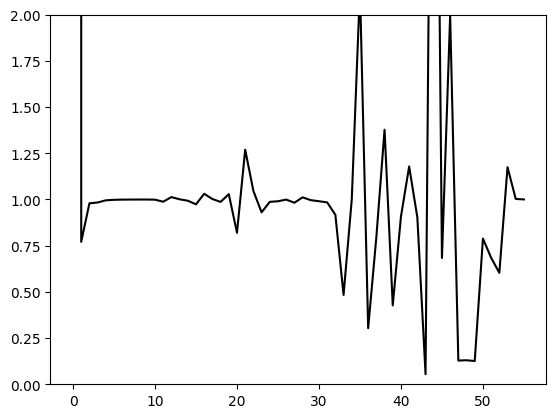

In [ ]:
import matplotlib.pyplot as plt
erros_prog = info_broyden_prog["erro real"]
razao_prog = []
for i in range(0, info_broyden_prog["passo"]):
  razao_prog.append(erros_prog[i]/(erros_prog[i-1]))
plt.plot(razao_prog, c="black")
plt.ylim([0,2])
plt.show()

In [ ]:
tabela = exibir_vetores(info_broyden_prog)

   i |         x1 |       x2 |        x3 |       x4 |        x5 |    diferença |         erro |       resíduo
-----+------------+----------+-----------+----------+-----------+--------------+--------------+---------------
   1 | 0.0106479  |  9.99922 | 5.00102   | 5.03642  | 0.036458  |  9.98935     | 28.9165      | 509.558
   2 | 0.00931055 |  9.99993 | 3.68549   | 3.74021  | 0.0366095 |  1.31554     | 22.2844      | 276.626
   3 | 0.00812386 | 10.0029  | 2.12982   | 2.2212   | 0.0367878 |  1.55566     | 21.8213      |  92.218
   4 | 0.00741543 | 10.0072  | 1.36875   | 1.49585  | 0.0368749 |  0.761076    | 21.4654      |  37.9325
   5 | 0.0069251  | 10.0134  | 0.875839  | 1.04643  | 0.0369311 |  0.492909    | 21.3676      |  15.3682
   6 | 0.00665182 | 10.0203  | 0.612067  | 0.827619 | 0.0369611 |  0.263773    | 21.3284      |   7.36023
   7 | 0.00652289 | 10.0273  | 0.48486   | 0.743324 | 0.0369754 |  0.127207    | 21.3123      |   4.51239
   8 | 0.00647631 | 10.0334  | 0.435246  | 0.

In [79]:
qntd_vezes = 1000
params = [x0, [], erro_maximo, qntd_maxima_passos, [], -1, residuo_maximo, True, False, False, True]
broyden_prog.bateria_testes_tempo(qntd_vezes, params)

> TEMPO TOTAL: 6.4267s
> TEMPO TOTAL MÉDIO: 0.000115s
> TEMPO TOTAL DP: 8.3e-05s
> QNTD MÉDIA DE PASSOS: 56.0
> PERCENTUAIS
* y: 18.34%
* p1: 5.59%
* A_inv: 47.68%
* z: 16.0%
* p: 10.68%
* s1t: 1.71%


In [ ]:
tabela = exibir_vetores(info_broyden_cent)

   i |         x1 |       x2 |        x3 |       x4 |        x5 |    diferença |         erro |       resíduo
-----+------------+----------+-----------+----------+-----------+--------------+--------------+---------------
   1 | 0.010648   |  9.99922 | 5.00102   | 5.03642  | 0.0364583 |  9.98935     | 28.9165      | 509.558
   2 | 0.00931056 |  9.99993 | 3.68549   | 3.74022  | 0.0366095 |  1.31554     | 22.2844      | 276.626
   3 | 0.00812387 | 10.0029  | 2.12982   | 2.2212   | 0.0367878 |  1.55566     | 21.8213      |  92.218
   4 | 0.00741543 | 10.0072  | 1.36875   | 1.49585  | 0.0368749 |  0.761076    | 21.4654      |  37.9325
   5 | 0.00692511 | 10.0134  | 0.87584   | 1.04643  | 0.0369311 |  0.492909    | 21.3676      |  15.3682
   6 | 0.00665183 | 10.0203  | 0.612067  | 0.827619 | 0.0369611 |  0.263773    | 21.3284      |   7.36024
   7 | 0.0065229  | 10.0273  | 0.48486   | 0.743324 | 0.0369754 |  0.127207    | 21.3123      |   4.51239
   8 | 0.00647632 | 10.0334  | 0.435246  | 0.

In [80]:
qntd_vezes = 1000
params = [x0, [], erro_maximo, qntd_maxima_passos, [], -1, residuo_maximo, True, False, False, True]
broyden_cent.bateria_testes_tempo(qntd_vezes, params)

> TEMPO TOTAL: 6.5482s
> TEMPO TOTAL MÉDIO: 0.000117s
> TEMPO TOTAL DP: 5.6e-05s
> QNTD MÉDIA DE PASSOS: 56.0
> PERCENTUAIS
* y: 18.45%
* p1: 5.6%
* A_inv: 47.37%
* z: 16.06%
* p: 10.79%
* s1t: 1.73%
